# **1. Rate vs. Spike**

## Rate-based Models

Artificial Neural Networks (ANNs, or DNNs in the "deep", multi-layered form) are computing systems widely used in Artificial Intelligence (AI) applications. The computational units (the nodes) of these networks are inspired by the standard rate-based neural models commonly adopted by the neuroscience community to simulate and study complex network activities. In the steady-state assumption (the internal dynamics of neurons and synapses are not considered) a simple equation describes the relationship between the continuous-valued output $y$ of the neuron and its inputs:

$$y = f(\sum_i w_i \cdot x_i + b)$$

where $x_i$ are the inputs, $w_i$ their weights, $b$ the bias and $f$ is typically a non-linear activation function such as a *sigmoid* or *hyperbolic tangent* function.

<center><div>
    <img src="https://c.mql5.com/2/35/artificialneuron__1.gif" width = 500/>
</div></center>

**In ANNs the output is a continuous value depending only on the instantaneous inputs. The neuron does not have an internal state affecting its output and no dynamics is considered.**

Despite their use for AI, where inputs and outputs have different interpretations according to the specific applications, from a neuroscience perspective both inputs and outputs are represented by neuronal instantaneous firing rates. As a matter of fact, according to this classical view of neural computation, the atom of information and computation is the amplitude of the **firing rate**, not the individual spikes. In particular, the **precise timing** of spikes has little relevance in this view. In contrast, a number of scientists have argued that neural computation critically relies on the temporal coordination of spikes. This debate originates by the fact that both spike timing and rate information can be drawn from the spike trains outputted by biological neurons: spike timing is what defines pulse trains, whereas rate is an abstract mathematical construction on spike trains.

## Spiking Models
This is where spiking neurons come into play. Spiking neural networks (or SNNs) are considered to be the third generation of neural networks for AI, preceeded by McCulloch-Pitts threshold neurons ("first generation") and Artificial Neural Networks with continuous activation functions ("second generation"). Among these network models, SNNs are the most biologically realistic ones, as information processing in such computational primitives is directly inspired by biological systems. Here information is encoded in spike trains, i.e. sequences of pulses (discrete, all-or-none events) with precise timing.

<center><img src="https://miro.medium.com/max/2304/1*MQjX5_S8G2zVEQBd_DrJHg.png" width=800></center>

**SNNs include explicit temporal dynamics, add an additional dependence on the current state (membrane potential) of the neuron, and communicate with each other using spikes.**

Biological neurons have been observed to produce sudden and short increases in voltage: spikes. The spike causes a charge to be transferred across the synapse between neurons. The charge from all the presynaptic neurons connected to a postsynaptic neuron builds up, until that neuron releases the charge itself in the form of a spike. The spike travels down the axon of the neuron arriving, after some delay, at the synapses of that neuron, causing charge to be passed forward to the next neuron. And the process repeats. The charge can result in either an excitatory response, in which the membrane voltage of the postsynaptic neuron increases or an inhibitory response, in which the membrane voltage of the postsynaptic neuron decreases as a result of the spike. Therefore SNNs have a dependence on the current state of the neurons, including explicit temporal dynamics describing the evolution of the process.

## Why should we use spikes in neuromorphic hardware?

According to the principle of “building-to-comprehend”, neuromorphic engineering is the best ally to understand brain computations and vision processings. Neuromorphic vision sensors functionally emulate the key features of the human retina and represent a major shift from conventional frame-based sensors, owing to the advantages of high temporal resolution and low power consumption. Similarly, neuromorphic processors are designed to emulate biological neurons by implementing the dynamics of spiking network models with silicon circuits. Thus, they represent a major shift from conventional von-Neumann architectures and offer great advantages such as ultra-low power and real-time computation.

Originally, spiking neurons were proposed from the computational neuroscience community for faithfully modeling biophysical mechanisms and information processing in biological neurons. With the advent of neuromorphic hardware, the machine-learning community has been attracted by employing SNNs for Artificial Intelligence (AI) applications, especially in computer vision. The reason is that SNNs provide a natural framework for these efficient processors and are, in theory, even more computationally powerful than non-spiking networks ([Networks of spiking neurons: the third generation of neural network models - Maass, 1997](https://igi-web.tugraz.at/PDF/85a.pdf)).

From a biological point of view, light is what we see when the retina converts photons into spikes. Odors are what we smell when volatilised molecules are converted into spikes. Touch is what we feel when nerve endings turn tactile pressure into spikes. All sesnory inputs are encoded into spikes. It is the natural language the brain understands. The brain trades in the global currency of the *spike*. In neuromorphic hardware, part of the appeal of encoding data in a similar fashion comes from the *three S's*: spikes, sparsity, and static suppression.

1.   **Spikes**: (a-b) Biological neurons process and communicate via spikes, which are electrical impulses of approximately 100 mV in amplitude. (c) Many computational models of neurons simplify this voltage burst to a discrete, single-bit event: a '1' or a '0'. This is far simpler to represent in hardware than a high precision value.

2.   **Sparsity**: (c) Neurons spend most of their time at rest, silencing most activations to *zero* at any given time. Not only are sparse vectors/tensors (with loads of zeros) cheap to store, but say we need to multiply sparse activations with synaptic weights. If most values are multiplied by '0', then we don't need to read many of the network parameters from memory. This means neuromorphic hardware can be extremely efficient. 

3.   **Static-Suppression (a.k.a, event-driven processing)**: (d-e) The sensory periphery only processes information when there is new information to process. Each pixel in (e) responds to *changes* in illuminance, so most of the image is blocked out. Conventional signal processing requires all channels/pixels to adhere to a global sampling/shutter rate, which slows down how frequently sensing can take place. Event-driven processing now only contributes to sparsity and power-efficiency by blocking unchanging input, but it often allows for much faster processing speeds.


<center>
<img src='https://github.com/jeshraghian/snntorch/blob/master/docs/_static/img/examples/tutorial1/3s.png?raw=true' width="500">
</center>

# **2. Leaky Integrate and Fire (LIF)**

## Internal dynamics
One of the simplest (yet flexible) models of spiking neurons is the Leaky Integrate and Fire (LIF) neuron model. Here, the state of the neuron at any time, known as the **membrane potential** $u(t)$, depends on its previous state in addition to its current inputs. The dynamics of this state can be described as follows (note that we now have an explicit notion of time):

$$\tau_m \cdot \frac{d{u}}{dt} = - [u(t) - u_{rest}] + R \cdot i(t)$$

where $\tau_m$ is the membrane time constant, which determines how much the neuron depends on its previous states and inputs (therefore defines the neuron's memory), $u_{rest}$ is the membrane potential in the resting state and $i(t)$ is an input current. This linear differential equation describes the dynamics of a system with *leaky* behavior, i.e. for which the membrane potential $u$ slowly *leaks* (decays) to $u_{rest}$. This is why the neuron model is referred to as a Leaky Integrate and Fire model. As an example of leakage, see the evolution of the membrane voltage - in panel C of the following figure - when the input current is too low for the neuron to fire a spike (e.g. first step current on the left):


<center><img src="https://www.researchgate.net/profile/Filip_Ponulak/publication/221740684/figure/fig1/AS:305454820413441@1449837512055/Time-course-of-the-membrane-potential-ut-of-a-leaky-integrate-and-fire-neuron-LIF.png" width=600><br /> <i>The time course of the membrane potential $u(t)$ of a LIF neuron (C) when driven by a current $i(t)$ is shown. The current can be either externally injected (A) or induced by the dynamics of a synapse in response to a presynaptic spike train (B). Initially, the state $u(t)$ of the LIF neuron is at the resting value $u_{rest}$ and the input current increases the membrane potential towards the firing threshold θ. Whenever the threshold is crossed the neuron emits a spike and the membrane voltage $u(t)$ is reset to a new value - here assumed to be equal to $u_{rest}$. The resulting output spikes of the LIF neuron are shown in D.</i><br /></center>


## Synaptic dynamics
The previous equation describes the dynamics at the level of the membrane of the neuron. But also synapses may have their own dynamics, describing how a **post-synaptic current** $i(t)$ evolves in time in response to input spike trains:

$$\tau_s \cdot \frac{d{i}}{dt} = - i(t) + \sum_i w_i \cdot \sum_j \delta(t-t_j^{i})$$

where $\sum_j \delta(t-t_j^i)$ is a stream of spikes from presynaptic neuron $i$ occurring at times $t_j^i$ and the values $w_i$ represent the corresponding weights. An input spike will therefore cause an instantaneous change in $i(t)$, while in the absence of new input spikes the synaptic current will decay towards zero under the synaptic time constant $\tau_s$. From this equation it is clear that the post-synaptic current is obtained by low-pass filtering the incoming spike trains. The resulting behavior of the post-synaptic current is shown in panel B of the previous figure.

## Spike generation

The output of the LIF neuron is binary and instantaneous. It is $1$ only when $u$ reaches a *threshold* value $u_{th}$, upon which the membrane potential is immediately *reset* to $u_{reset}$. Frequently, the resting value $u_{rest}$ of the membrane potential can be used as the reset value. The instantaneous output is typically referred to as a *spike* at time $t$. A series of such spikes, i.e. the output **spike train** of the neuron, will hence forth be referred to as $s(t)$.

$$
u(t+\delta t) = 
\begin{cases}
u_{reset},& \text{if } u(t) \geq u_{th} \\ 
u(t),& \text{otherwise} 
\end{cases}
$$


$$
s(t) = 
\begin{cases}
1,& \text{if } u(t)\geq u_{th}\\
0,& \text{otherwise}
\end{cases}
$$

When the spike generation mechanism is taken into account, the evolution of the membrane voltage undergoes immediate resets every time the threshold is crossed, as shown in panel C of the figure above in the case of strong-enough inputs. The resulting spiking activity is shown in panel D.


## Simulate the LIF neuron

Let's simulate a LIF neuron from scratch using Python basic packages. We will give to it a random spike train as input and visualize the evolution of its internal variables, as well as its output spiking activity, in time.

#### **Generate an input activity**

First of all, we should set the simulation parameters (i.e. total duration and time-step) and then generate a random ("Poisson") spike train by thresholding random noise. We will use a $10$% firing probability.

In [1]:
# --> Import some useful packages

import numpy as np
# !pip3 install -U matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

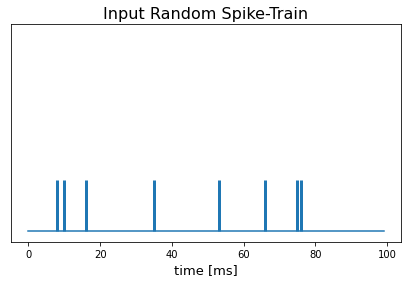

In [2]:
# --> Generate a random spike train

# Define simulation time-step and duration
dt = 1                                        # Time-setp (ms)
T = 100                                       # Total duration (ms)
N = int(round(T/dt))                          # Number of samples
times = np.linspace(0, T, N, endpoint=False)  # Array of times

# Generate a random spike train: we will have a spike every time a randomly-extracted
# number (with uniform distribution from range [0, 1]) is smaller than spike_prob
np.random.seed(3)  # just for reproducibility
spike_prob = 0.1
spikes_in = np.random.rand(N,) < spike_prob
spike_times_in = times[spikes_in].flatten()

# Plot the spike train
plt.figure(figsize=(7, 4))
markerline, stemlines, baseline = plt.stem(times, spikes_in, basefmt='C0', use_line_collection=True)
markerline.set_marker("")
stemlines.set_linewidth(3)
plt.xlabel('time [ms]', fontsize=13)
plt.title('Input Random Spike-Train', fontsize=16)
plt.ylim(-.2, 4)
plt.yticks([], [])
plt.show()

#### **Solve differential equations**
Now that we have a pre-synaptic spiking activity, let's see how the membrane potential $u(t)$ and the synaptic current $i(t)$ of the post-synaptic LIF neuron evolve in time. To do so, we implement the synaptic and membrane dynamics by iterating over time and compute their values in the simplest possible way. We will also include spike generation in the simulation, by resetting the membrane voltage every time it reaches the threshold value, and show the resulting output spike train of our neuron. We will *not* consider other possible mechanisms interfering with the these dynamics, such as *refractory*.

Note that, in order to deal with variables having all the same dimensions (same unit of measurement), instead of the sinaptic current we will consider the *synaptic potential* (which we will call $u_s(t)$). These two variables are directly related to each other by the following relationship: $u_s(t) = R \cdot i(t)$. In this case, the synaptic weight $w$ (which we will now call $w_s$) will also have voltage units.

In [3]:
# --> A simple Euler solver for synapse and membrane integration

# Neuron and synapse parameters
tau_m = 10        # Membrane time constant (ms)
tau_s = 10        # Synaptic time constant (ms)
u_rest = -70      # Resting potential (mV)
u_th = -50        # Threshold for spike generation (mV)
u_reset = u_rest  # Reset potential (mV)
w_s = 22          # Synaptic weight (mV)

# Initialization
u = u_rest        # Initialize membrane potential
u_s = 0           # Initialize synaptic potential

# Create variables for storing data
u_t = np.zeros_like(times)
u_s_t = np.zeros_like(times)
spikes_out = np.zeros_like(times)
spike_times_out = []

# Loop over time and solve the synapse and membrane dynamics
for k in range(N):

    # 1) Synaptic dynamics integration
    du_s = - u_s / tau_s + w_s * spikes_in[k]
    u_s += du_s
    
    # 2) Membrane dynamics integration
    du = - (u - u_rest - u_s) / tau_m
    u += du

    # 3) Spike generation
    if u >= u_th:

      # Reset membrane potential
      u = u_reset  

      # Save output spikes
      spikes_out[k] = 1
      spike_times_out.append(times[k])
    
    # Save synapse and membrane state evolution
    u_t[k] = u
    u_s_t[k] = u_s


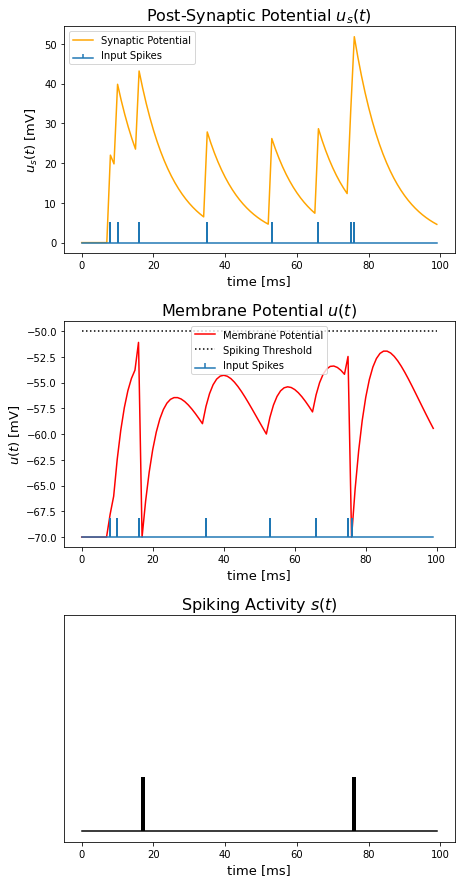

In [4]:
# --> Plot membrane and synaptic states' evolution and input/output spikes

plt.figure(figsize=(7, 15))
plt.subplot(311)
plt.plot(times, u_s_t, c='orange', label='Synaptic Potential')
markerline, stemlines, baseline = plt.stem(times, spikes_in * 0.1 * (u_s_t.max() - u_s_t.min()),
                                           basefmt='C0', use_line_collection=True, label='Input Spikes')
markerline.set_marker("")
stemlines.set_linewidth(2)
plt.xlabel('time [ms]', fontsize=13)
plt.ylabel('$u_s(t)$ [mV]', fontsize=13)
plt.title('Post-Synaptic Potential $u_s(t)$', fontsize=16)
plt.legend()

plt.subplot(312)
plt.plot(times, u_t, c='red', label='Membrane Potential')
plt.plot([0, T], [u_th, u_th], 'k:', label='Spiking Threshold')
markerline, stemlines, baseline = plt.stem(times, u_reset + spikes_in * 0.1 * (u_t.max() - u_t.min()), bottom=u_reset,
                                           basefmt='C0', use_line_collection=True, label='Input Spikes')
markerline.set_marker("")
stemlines.set_linewidth(2)
plt.xlabel('time [ms]', fontsize=13)
plt.ylabel('$u(t)$ [mV]', fontsize=13)
plt.title('Membrane Potential $u(t)$', fontsize=16)
plt.legend()

plt.subplot(313)
markerline, stemlines, baseline = plt.stem(times, spikes_out, basefmt='k', linefmt='-k', use_line_collection=True)
markerline.set_marker("")
stemlines.set_linewidth(4)
plt.ylim(-.2, 4)
plt.yticks([], [])
plt.xlabel('time [ms]', fontsize=13)
plt.title('Spiking Activity $s(t)$', fontsize=16)
plt.subplots_adjust(hspace=0.3)
plt.show()

# **3. Spiking Networks on Brian2**

## Why Brian2?



Brian2 is a simulator for spiking neural networks written in Python programming language. It became so popular in the neuroscience community that is now considered a benchmark for building and running SNNs. It is a very powerful tool as it allows to simulate complex neural networks in a simple and intuitive framework, leaving room to many possible variations you want to introduce in the models, therefore being flexible and easily extensible.
<img src="https://brian2.readthedocs.io/en/stable/_static/brian-logo.png" width=200, align='right'>
It also allows, through specific backends, to run simuations on graphic cards, thus accelerating them by exploiting the computational power of high performance GPUs. Also, specific packages have been built on top of brian2 to implement SNNs on dedicated neuromorphic hardware: an example of this is *teili*, a toolbox providing neuromorphic engineers with a playground for implementing neural algorithms, as well as an interface with the DYNAPse neuromorphic processor. Other Python packages providing an interface to neuromorphic hardware are *PyNN*, which allows sending large-scale networks on spiking processors (such as Spinnaker or BrainScales) remotely via cloud, or *Nengo*, which carries an API for Intel’s neuromorphic Loihi chip.



## Using Brian2

The Brian2 library implements and provides a set of specific classes and methods for generating spiking neural networks and running simulations. The basic steps for building a network are:

1. Establish the time-step
1. Create the neural populations
1. Create the connections (synapses) between the populations
1. Setup data monitoring
1. Build the network object and feed it with neural populations, synapses and monitors
1. Run the simulation
1. Retrieve and plot the recorded data

**Read the documentation for more information on all the implemented objects:**  https://brian2.readthedocs.io/en/stable/


Thanks to the provided tools, we can re-write the previous example in a few lines of code:


In [5]:
# --> Import brian2
# Note: unfortunately brian2 is not available by default on google colab.
# In order to use it we must therefore install it on the cloud every time we run
# a new notebook (but don't panic, nothing will be installed on your pc
# unless you are using jupyter on your system).

try:
    from brian2 import *
except ModuleNotFoundError:
    !pip install brian2
    from brian2 import *

In [6]:
# --> Build the network and run the simulation

# Define all the paramters for the simulation, giving them appropriate dimensions (!)
dt = 1 * ms
T = 100 * ms
tau_m = 10 * ms
tau_s = 10 * ms
u_th = -50 * mV
u_rest = -70 * mV
u_reset = -70 * mV
w_s = 22 * mV

# ---------------- 1. Establish the time-step of the simulation ----------------
defaultclock.dt = dt

# ---------------------- 2. Create the neural populations ----------------------
# Generate an input neuron group with 1 neuron and with the same spiking
# activity as the spike train randomly generated before
Neuron_input = SpikeGeneratorGroup(N=1, times=(spike_times_in) * ms,
                                   indices=np.zeros_like(spike_times_in)) 
# Define the neural model specifying differential equations for the dynamics.
# Note that we put u_s in place of Ri in the equation describing the evolution of u
# (for the reasons discussed above) and we do not put the sum of all input spike-trains
# in the equation of the post-synaptic variable u_s (because we must update u_s
# with the input spikes at the pre-synaptic level: see the synapse object)
model = '''
du/dt = - (u - u_rest - u_s) / tau_m   : volt     # internal dynamics
du_s/dt = - u_s / tau_s                : volt     # synaptic dynamics
'''
# Create a neuron gruoup with 1 neuron, specify threshold and reset mechanisms,
# and the method to use for integrating the above equations
Neuron_output = NeuronGroup(N=1, model=model, threshold='u >= u_th',
                            reset='u = u_reset', method='euler')
Neuron_output.u = u_rest  # Initialize membrane potential

# --------------------------- 3. Create the synapses ---------------------------
# Specify source and target populations of the synapse, the unit of measurement
# of the weight w and take account of the inconimg spikes at the pre-synaptic level
Syn = Synapses(source=Neuron_input, target=Neuron_output,
               model="""w : volt""", on_pre='u_s += w')
Syn.connect()  # Actually connect the neurons (you can specifiy the connectvity)
Syn.w = w_s  # Set the synaptic weight

# -------------------------- 4. Setup data monitoring --------------------------
# Monitor the input and output spikes, the membrane voltage u and the
# post-synaptic potential u_s
Mon_spikes_out = SpikeMonitor(source=Neuron_output)
Mon_u = StateMonitor(source=Neuron_output, variables=['u', 'u_s'], record=True)

# -------------------- 5. Build and feed the network object --------------------
net = Network(Neuron_input, Neuron_output, Syn,
              Mon_u, Mon_spikes_out)

# --------------------------- 6. Run the simulation ----------------------------
net.run(T, report='stdout')

# ----------------------- 7. Retrieve the recorded data ------------------------
# Create arrays for membrane voltage and post-synaptic potential evolutions
u_t = Mon_u.u[0] / mV
u_s_t = Mon_u.u_s[0] / mV
# Create arrays of times
N = int(round(T/dt))
times = np.linspace(0, T / ms, N, endpoint=False)
# Create output spike-train arrays (put 1 when a spike is fired and 0 otherwise)
spike_times_out = Mon_spikes_out.t / ms
spikes_out = np.zeros_like(times)
for t in spike_times_out:
    spikes_out[times == t] = 1

WARNING    'u' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value -59.44253095263988. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'u_s' is an internal variable of group 'neurongroup', but also exists in the run namespace with the value 4.590203933634839. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'u_s' is an internal variable of group 'synapses', but also exists in the run namespace with the value 4.590203933634839. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


Starting simulation at t=0. s for a duration of 100. ms
100. ms (100%) simulated in < 1s


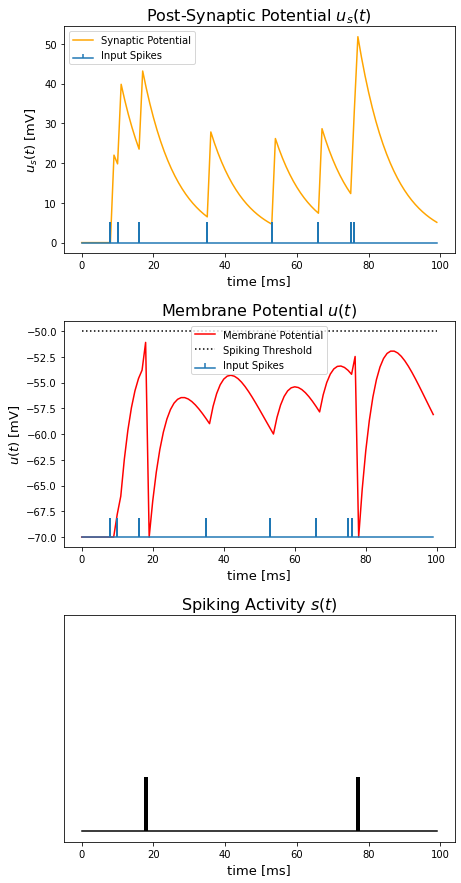

In [7]:
# --> Plot membrane and synaptic states' evolution and input/output spikes

plt.figure(figsize=(7, 15))
plt.subplot(311)
plt.plot(times, u_s_t, c='orange', label='Synaptic Potential')
markerline, stemlines, baseline = plt.stem(times, spikes_in * 0.1 * (u_s_t.max() - u_s_t.min()),
                                           basefmt='C0', use_line_collection=True, label='Input Spikes')
markerline.set_marker("")
stemlines.set_linewidth(2)
plt.xlabel('time [ms]', fontsize=13)
plt.ylabel('$u_s(t)$ [mV]', fontsize=13)
plt.title('Post-Synaptic Potential $u_s(t)$', fontsize=16)
plt.legend()

plt.subplot(312)
plt.plot(times, u_t, c='red', label='Membrane Potential')
plt.plot([0, T / ms], [u_th / mV, u_th / mV], 'k:', label='Spiking Threshold')
markerline, stemlines, baseline = plt.stem(times, u_reset / mV + spikes_in * 0.1 * (u_t.max() - u_t.min()), bottom=u_reset / mV,
                                           basefmt='C0', use_line_collection=True, label='Input Spikes')
markerline.set_marker("")
stemlines.set_linewidth(2)
plt.xlabel('time [ms]', fontsize=13)
plt.ylabel('$u(t)$ [mV]', fontsize=13)
plt.title('Membrane Potential $u(t)$', fontsize=16)
plt.legend()

plt.subplot(313)
markerline, stemlines, baseline = plt.stem(times, spikes_out, basefmt='k', linefmt='-k', use_line_collection=True)
markerline.set_marker("")
stemlines.set_linewidth(4)
plt.ylim(-.2, 4)
plt.yticks([], [])
plt.xlabel('time [ms]', fontsize=13)
plt.title('Spiking Activity $s(t)$', fontsize=16)
plt.subplots_adjust(hspace=0.3)
plt.show()

#### **Extension**

- Try changing the code above by generating a Poisson input spike-train having same mean firing rate as the input spike-train previously considered (hint: use a "*PoissonGroup*" object instead of the "*SpikeGeneratorGroup*"), and add a refractory period of $10$ms to the output neuron (hint: you must put the 'unless refractory' flag in the neuron model). Then try increasing the firing rate of the Poisson group and see the effect of the refractory.
- Try changing some parametrs of the previous simulation (e.g. time constants, sign and value of the synaptic weight, etc.) and observe the resulting behavior.

WARNING    'u' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value -59.44253095263988. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'u_s' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 4.590203933634839. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'dt' is an internal variable of group 'poissongroup', but also exists in the run namespace with the value 1. * msecond. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'u_s' is an internal variable of group 'synapses_1', but also exists in the run namespace with the value 4.590203933634839. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


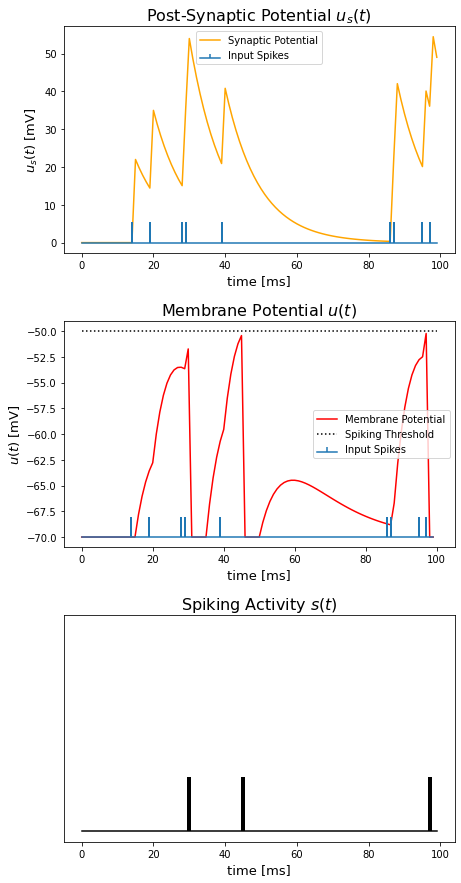

In [8]:
#@title Double-click here for solution

# Add the definition of refractory period!
tau_ref = 5 * ms
dt = 1 * ms
T = 100 * ms
tau_m = 10 * ms
tau_s = 10 * ms
u_th = -50 * mV
u_rest = -70 * mV
u_reset = -70 * mV
w_s = 22 * mV

# ---------------- 1. Establish the time-step of the simulation ----------------
defaultclock.dt = dt

# ---------------------- 2. Create the neural populations ----------------------
# Generate a Poisson neuron group with 1 neuron and firing rate equal to the one
# of the previously generated random spike-train
spike_rate_in = len(spike_times_in) / (T / ms * 10 ** -3) * Hz
Neuron_input = PoissonGroup(N=1, rates=spike_rate_in)
# Add the 'unless refractory' flag!
model = '''
du/dt = - (u - u_rest - u_s) / tau_m   : volt (unless refractory)
du_s/dt = - u_s / tau_s                : volt
'''
# Add the refractory mechanism to the neuron!
Neuron_output = NeuronGroup(N=1, model=model, threshold='u >= u_th',
                            reset='u = u_reset', refractory=tau_ref, method='euler')
Neuron_output.u = u_rest

# --------------------------- 3. Create the synapses ---------------------------
Syn = Synapses(source=Neuron_input, target=Neuron_output,
               model="""w : volt""", on_pre='u_s += w')
Syn.connect()
Syn.w = w_s

# -------------------------- 4. Setup data monitoring --------------------------
# You should monitor also the input firing activity now!
Mon_spikes_in = SpikeMonitor(source=Neuron_input)
Mon_spikes_out = SpikeMonitor(source=Neuron_output)
Mon_u = StateMonitor(source=Neuron_output, variables=['u', 'u_s'], record=True)

# -------------------- 5. Build and feed the network object --------------------
# Don't forget to add 'Mon_spike_in' to the network!
net = Network(Neuron_input, Neuron_output, Syn,
              Mon_spikes_in, Mon_u, Mon_spikes_out)

# --------------------------- 6. Run the simulation ----------------------------
net.run(T)

# ------------------ 7. Retrieve and plot the recorded data --------------------
u_t = Mon_u.u[0] / mV
u_s_t = Mon_u.u_s[0] / mV
N = int(round(T/dt))
times = np.linspace(0, T / ms, N, endpoint=False)
spike_times_out = Mon_spikes_out.t / ms
spikes_out = np.zeros_like(times)
for t in spike_times_out:
  spikes_out[times == t] = 1
# You should also create input spike-train arrays now!
spike_times_in = Mon_spikes_in.t / ms
spikes_in = np.zeros_like(times)
for t in spike_times_in:
  spikes_in[times == t] = 1

# Plots
plt.figure(figsize=(7, 15))
plt.subplot(311)
plt.plot(times, u_s_t, c='orange', label='Synaptic Potential')
markerline, stemlines, baseline = plt.stem(times, spikes_in * 0.1 * (u_s_t.max() - u_s_t.min()), basefmt='C0', label='Input Spikes')
markerline.set_marker("")
stemlines.set_linewidth(2)
plt.xlabel('time [ms]', fontsize=13)
plt.ylabel('$u_s(t)$ [mV]', fontsize=13)
plt.title('Post-Synaptic Potential $u_s(t)$', fontsize=16)
plt.legend()

plt.subplot(312)
plt.plot(times, u_t, c='red', label='Membrane Potential')
plt.plot([0, T / ms], [u_th / mV, u_th / mV], 'k:', label='Spiking Threshold')
markerline, stemlines, baseline = plt.stem(times, u_reset / mV + spikes_in * 0.1 * (u_t.max() - u_t.min()), basefmt='C0', bottom=u_reset / mV, label='Input Spikes')
markerline.set_marker("")
stemlines.set_linewidth(2)
plt.xlabel('time [ms]', fontsize=13)
plt.ylabel('$u(t)$ [mV]', fontsize=13)
plt.title('Membrane Potential $u(t)$', fontsize=16)
plt.legend()

plt.subplot(313)
markerline, stemlines, baseline = plt.stem(times, spikes_out, basefmt='k', linefmt='-k')
markerline.set_marker("")
stemlines.set_linewidth(4)
plt.ylim(-.2, 4)
plt.yticks([], [])
plt.xlabel('time [ms]', fontsize=13)
plt.title('Spiking Activity $s(t)$', fontsize=16)
plt.subplots_adjust(hspace=0.3)
plt.show()

# **4. Exercises**
The following exercises are designed to provide a hands-on introduction to Brian2 and enhance your understanding of SNNs. You should follow the step-by-step instructions in the linked notebooks.

 - [Task 1: Synfire Chain](https://github.com/SimoNeT-Git/NC-ICT/blob/main/task1-SynfireChain.ipynb)
    - Create a **synfire chain** network from a single "*NeuronGroup*" of 100 inter-connected LIF neurons. Use a "*SpikeGeneratorGroup*" to stimulate the first neuron in the population at the start, thus triggering the resulting population dynamics. Record spikes and visualise a rasterplot (use "*scatter*" function from matplotlib.pyplot) of population activity after running the "*Network*" for 2 seconds.
    - See the notebook for further extensions.
 - [Task 2: Balanced Random Cortex-like Network](https://github.com/SimoNeT-Git/NC-ICT/blob/main/task2-BalancedRandomNet.ipynb)
    - Create a **balanced random network** consisting of one excitatory (E) and one inhibitory (I) "*NeuronGroup*" of LIF neurons, with a 4:1 E-I ratio and sparse reciprocal connectivity. The E population excites I and itself, while I inhibites E and itself. Extract weights and delays from normal distributions and use a different resting potential for each neuron taking it from a uniform distribution. Stimulate each neuron using a one-to-one connection from a "*PoissonGroup*" with rate 1000Hz. Run the "*Network*" for 1 second and visualise a rasterplot with all spikes from both populations.
    - See the notebook for further extensions.
 - [Task 3: Reichardt Detectors on Neuromorphic Sensor's Recordings](https://github.com/SimoNeT-Git/NC-ICT/blob/main/task3_ReichardtDetectors.ipynb)
    - Create a **Hassenstein-Reichardt detector** consisting of subsequent spatial and temporal filtering of the input spikes. Such input consists of event-based data recorded from the neuromorphic sensor. Code for the initial data loading and pre-processing is given and you will have to build the network for motion perception. The network is made of a "*SpikeGeneratorGroup*" for the input events and 3 populations of LIF neurons. The first "*NeuronGroup*" applies convolution on the input data (spatial filtering) while the other 2 groups set the delays (temporal filtering) in case of both rightward (R) and leftward (L) motion selectivity. Run the "*Network*" for 300ms. Visualise membrane potentials and spikes of the convolutional layer, and the resulting outputs of R and L detectors.
    - See the notebook for further extensions.



---


# References & End Notes

Below I report some links to online material which you could find useful if interested on these topics and want to learn more:
 
 1. For an exhaustive introduction and getting started with *Google Colaboratory* watch this [video](https://www.youtube.com/watch?v=inN8seMm7UI) and read this [notebook](https://colab.research.google.com/notebooks/intro.ipynb).

 2. For a comparison between Matlab and Python read this [article](https://realpython.com/matlab-vs-python/).

 3. For a very deep explanation of different neuron and synapse models read this [book](https://neuronaldynamics.epfl.ch/online/index.html) from computational neuroscientist *Wulfram Gerstner*, including [exercises](https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/index.html), [notes](https://neuronaldynamics.epfl.ch/lectures.html) and [video lectures](https://lcnwww.epfl.ch/gerstner/NeuronalDynamics-MOOCall.html).

 4. For more information on *Brian2* Python library read the [documentation](https://brian2.readthedocs.io/en/stable/).

 5. For some exercises on SNN applications for AI see this [repository](https://github.com/synsense/snn-workshop-amld-2020/).

<u>End note</u>: the introduction to SNNs was adapted from [this notebook](https://colab.research.google.com/github/ai-cortex/snn-workshop-amld-2020/blob/master/Notebooks/1_IntroToSNNs/1_IntroToSNNs.ipynb) written for the AMLD 2020 workshop on using SNNs for low-power and real-time inference tasks, while exercises 1 and 2 were adapted from [material](http://spinnakermanchester.github.io/workshops/) provided during the workshop on using Spinnaker neuromorphic hardware in occasion of the 4<sup>th</sup> HBP student conference (Pisa, January 2020).